<a href="https://colab.research.google.com/github/Durgaganeshpate/sparks-internship/blob/main/task4_stock_market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Task 4 : Stock Market Prediction using Numerical and Textual Analysis¶
GRIP @ The Sparks Foundation
In this task I tried to create a hybrid model for stock price/performance prediction using numerical analysis of historical stock prices, and sentimental analysis of news headlines.  

Technical Stack : Sikit Learn, Numpy Array, Pandas, Matplotlib, Keras, NLTK, Textblob, Xgboost

In [ ]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn import metrics 
from keras.models import Sequential
from keras.layers import Dense, LSTM
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import re
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('vader_lexicon')
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
import xgboost

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


Step 1 : Importing the Numerical dataset and performing Exploratory Analysis

In [ ]:
# Dataframe for exploratory analysis
df=pd.read_csv('task4.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-10-16,38637.050781,38666.378906,38416.671875,38598.988281,38598.988281,27500.0
1,2019-10-17,38647.441406,39104.691406,38557.429688,39052.058594,39052.058594,47100.0
2,2019-10-18,39087.828125,39361.058594,38963.601563,39298.378906,39298.378906,42400.0
3,2019-10-22,39233.398438,39426.468750,38924.851563,38963.839844,38963.839844,54500.0
4,2019-10-23,39063.839844,39196.671875,38866.078125,39058.828125,39058.828125,41000.0


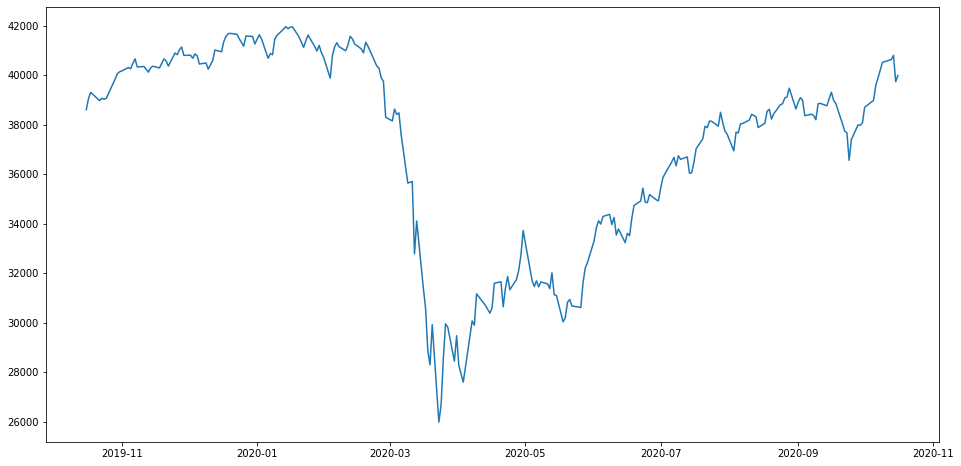

In [ ]:

# Extract date frame and plot closing stock price w.r.t time
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']
df.dropna(inplace=True)
#plot
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history')

In [ ]:
# fix random seed for reproducibility
np.random.seed(7)


Step 2 : Creating a dataframe for storing the Closing stock data per day

In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(df2, look_back=1):
	dataX, dataY = [], []
	for i in range(len(df2)-look_back-1):
		a = df2[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(df2[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [ ]:
df2 = pd.read_csv('task4.csv', usecols=[5], engine='python')
df2.dropna(inplace=True)
df2 = df2.values
df2 = df2.astype('float32')

Step 3 : Data Normalization and Division into Training and Test sets

In [ ]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
df2 = scaler.fit_transform(df2)

# split into train and test sets
train_size = int(len(df2) * 0.67)
test_size = len(df2) - train_size
train, test = df2[0:train_size,:], df2[train_size:len(df2),:]

In [ ]:
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

Step 4 : Creating a LSTM for Numerical Analysis

In [ ]:

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(7, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
162/162 - 2s - loss: 0.3187
Epoch 2/100
162/162 - 0s - loss: 0.0434
Epoch 3/100
162/162 - 0s - loss: 0.0247
Epoch 4/100
162/162 - 0s - loss: 0.0152
Epoch 5/100
162/162 - 0s - loss: 0.0086
Epoch 6/100
162/162 - 0s - loss: 0.0049
Epoch 7/100
162/162 - 0s - loss: 0.0035
Epoch 8/100
162/162 - 0s - loss: 0.0030
Epoch 9/100
162/162 - 0s - loss: 0.0030
Epoch 10/100
162/162 - 0s - loss: 0.0030
Epoch 11/100
162/162 - 0s - loss: 0.0030
Epoch 12/100
162/162 - 0s - loss: 0.0030
Epoch 13/100
162/162 - 0s - loss: 0.0029
Epoch 14/100
162/162 - 0s - loss: 0.0030
Epoch 15/100
162/162 - 0s - loss: 0.0030
Epoch 16/100
162/162 - 0s - loss: 0.0029
Epoch 17/100
162/162 - 0s - loss: 0.0030
Epoch 18/100
162/162 - 0s - loss: 0.0029
Epoch 19/100
162/162 - 0s - loss: 0.0029
Epoch 20/100
162/162 - 0s - loss: 0.0028
Epoch 21/100
162/162 - 0s - loss: 0.0030
Epoch 22/100
162/162 - 0s - loss: 0.0029
Epoch 23/100
162/162 - 0s - loss: 0.0030
Epoch 24/100
162/162 - 0s - loss: 0.0029
Epoch 25/100
162/162 - 0s

In [ ]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

Step 5 : Making Predictions

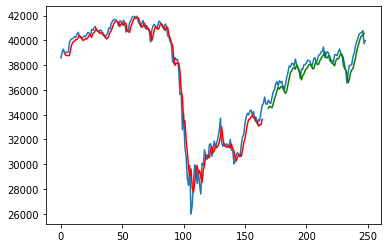

In [ ]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(df2)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df2)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(df2)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df2))
plt.plot(trainPredictPlot,color='red')
plt.plot(testPredictPlot,color='green')
plt.show()

In [ ]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print("Root mean square error = ",trainScore," RMSE")
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print("Root mean square error = ",testScore," RMSE")

Root mean square error =  740.0626994572888  RMSE
Root mean square error =  587.2927502370709  RMSE


Step 6 : Creating a Hybrid model for Numerical and textual Analysis

In [ ]:
#Text Analysis

columns = ['Date','Category','News']
news = pd.read_csv('task4.csv', names = columns)
news

,,,,Date,Category,News
Date,Open,High,Low,Close,Adj Close,Volume
2019-10-16,38637.050781,38666.378906,38416.671875,38598.988281,38598.988281,27500
2019-10-17,38647.441406,39104.691406,38557.429688,39052.058594,39052.058594,47100
2019-10-18,39087.828125,39361.058594,38963.601563,39298.378906,39298.378906,42400
2019-10-22,39233.398438,39426.468750,38924.851563,38963.839844,38963.839844,54500
...,...,...,...,...,...,...
2020-10-12,40716.949219,40905.488281,40387.398438,40593.800781,40593.800781,17600
2020-10-13,40592.539063,40786.820313,40461.968750,40625.511719,40625.511719,11000
2020-10-14,40623.191406,40880.250000,40279.550781,40794.738281,40794.738281,15000
2020-10-15,41048.050781,41048.050781,39667.468750,39728.410156,39728.410156,30400



Step 7 : Text preprocessing

In [ ]:

news.drop('Category', axis = 1, inplace=True)
news.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 252 entries, ('Date', 'Open', 'High', 'Low') to ('2020-10-16', '39936.609375', '40125.710938', '39699.421875')
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    250 non-null    object
 1   News    250 non-null    object
dtypes: object(2)
memory usage: 63.8+ KB
